In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
df= pd.read_csv('archive (1)/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Gender':'Genders'}, inplace=True)

In [4]:
df.head()

,CustomerID,Genders,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Genders                   object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [16]:
# df.drop(['CustomerID'] ,axis=1,inplace=True )
df

,Genders,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


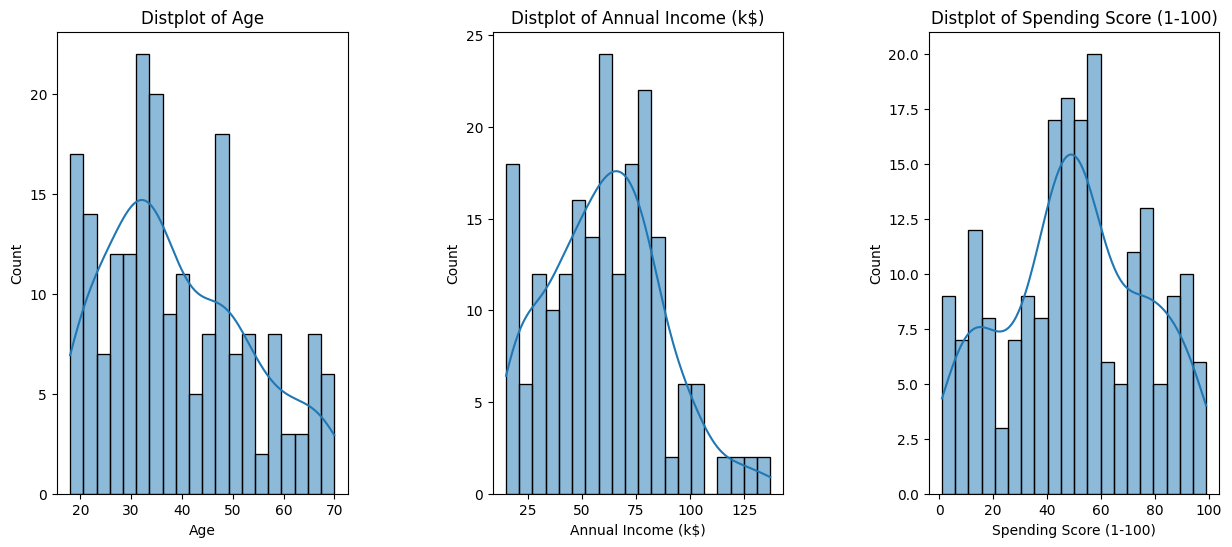

In [19]:

plt.figure(1, figsize=(15, 6))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  # Use sns.histplot() instead of sns.displot()
    plt.title('Distplot of {}'.format(x))

plt.show()


INSIGHT 
- HIGHEST DENSITY IS FOR THE AGE GROUP 30 TO 40
- MOST PEOPLE HAVE ANNUAL INCOME OF 50 TO 70
- MOST PEOPLE HAVE SPENDING SCORE OF 50

### 3. COMPARISON BTW MALE AND FEMALE COUNT

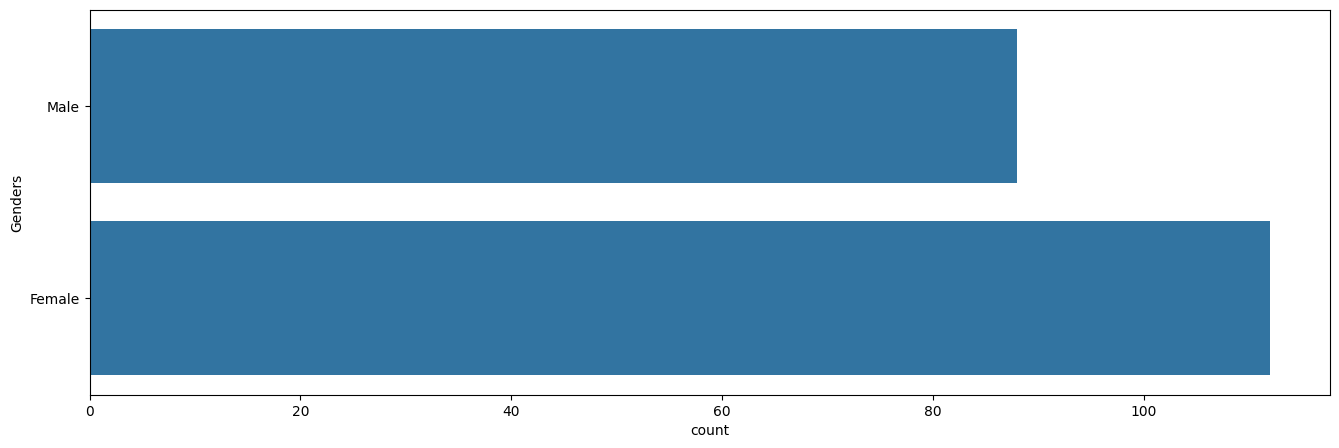

In [24]:
plt.figure(1,figsize=(16,5))
sns.countplot(y=df['Genders'], legend="auto")
plt.show()

### 5. violin plot for all columns with respect to gender

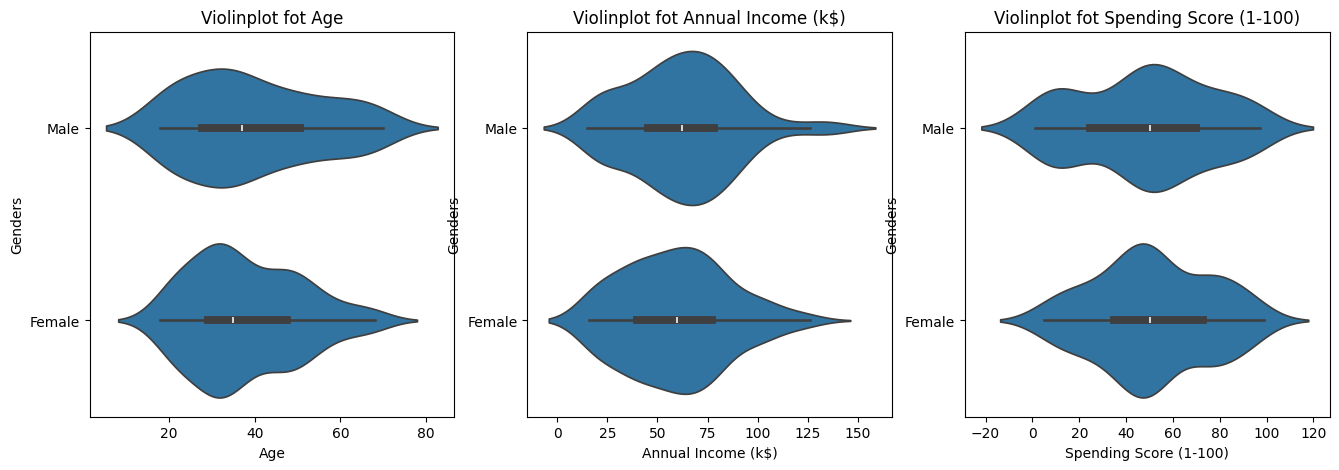

In [27]:
plt.figure(1, figsize=(16,5))
n=0
for x in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.violinplot(x=df[x], y='Genders', data=df)
    plt.title('Violinplot fot {}'.format(x))
plt.show()

density is high for females at age 30

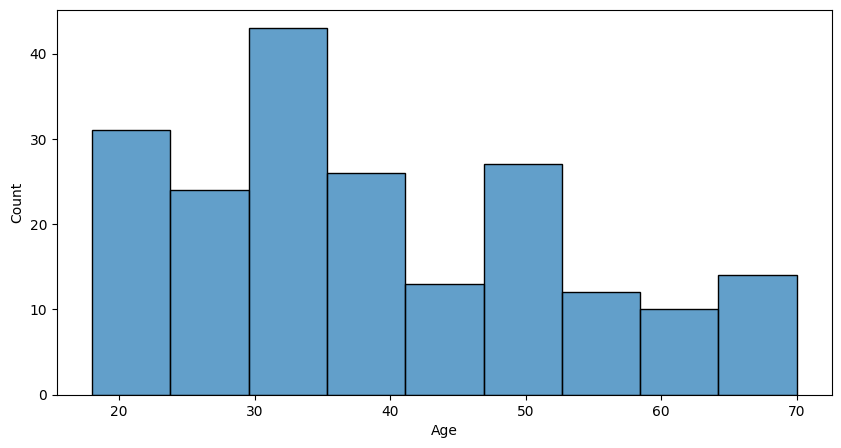

In [37]:
plt.figure(1,figsize=(10,5))
sns.histplot(x=df['Age'], bins='auto', kde=False,  alpha=0.7)
plt.show()

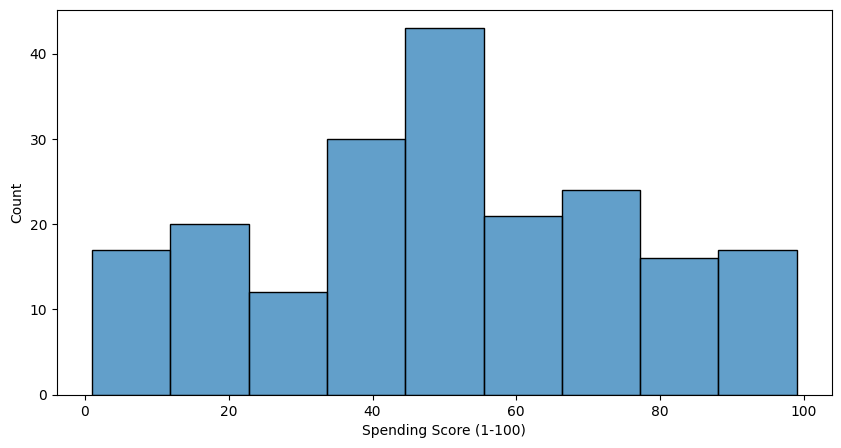

In [39]:
plt.figure(1,figsize=(10,5))
sns.histplot(x=df['Spending Score (1-100)'], bins='auto', kde=False, alpha=0.7)
plt.show()

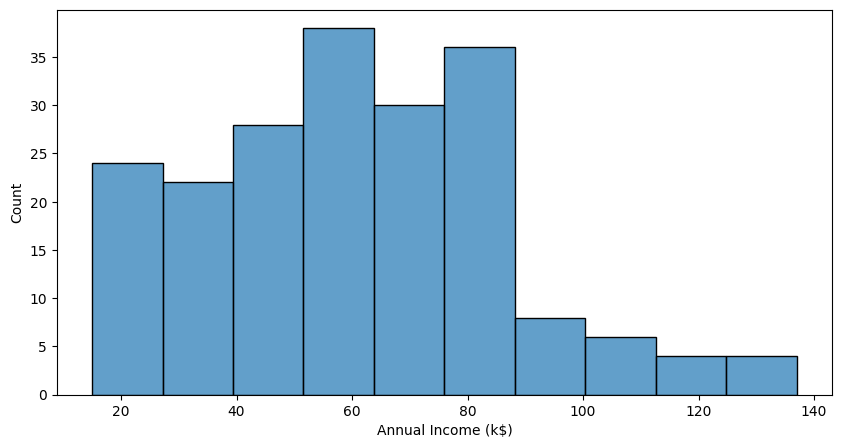

In [40]:
plt.figure(1,figsize=(10,5))
sns.histplot(x=df['Annual Income (k$)'], bins='auto', kde=False, alpha=0.7)
plt.show()

### 5. find out k value 

c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

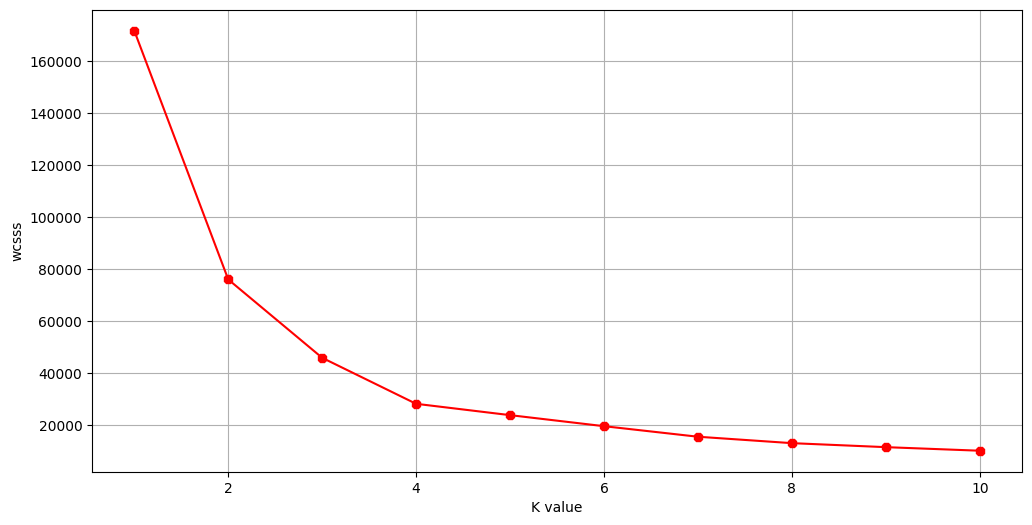

In [42]:
# Extracting features for clustering
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

# Importing KMeans from scikit-learn
from sklearn.cluster import KMeans

# Initializing an empty list to store the within-cluster sum of squares (WCSS) for different values of K
wcss = []

# Looping through different values of K (number of clusters)
for k in range(1, 11):
    # Creating a KMeans instance with k clusters and using 'k-means++' initialization
    kmeans = KMeans(n_clusters=k, init='k-means++')
    
    # Fitting the KMeans model to the data
    kmeans.fit(X1)
    
    # Appending the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, color="red", marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


Explanation:

Feature Extraction (X1): Extracting two features, "Age" and "Spending Score (1-100)," from the DataFrame df and storing them in the array X1.

Importing KMeans: Importing the KMeans class from scikit-learn's sklearn.cluster module.

Loop for Different K Values: The code then iterates through different values of K (number of clusters) from 1 to 10.

KMeans Modeling: For each value of K, a KMeans model is created with the specified number of clusters (n_clusters=k) and 'k-means++' initialization.

Fitting the Model: The KMeans model is fitted to the data (X1) using the fit method.

WCSS Calculation: The Within-Cluster Sum of Squares (WCSS), also known as inertia, is computed using the inertia_ attribute of the fitted KMeans model. WCSS represents the sum of squared distances of each point in a cluster to the centroid of that cluster.

Appending WCSS to List (wcss): The computed WCSS value for each K is appended to the wcss list.

Elbow Method Plot: Finally, a plot is generated using Matplotlib, where the x-axis represents the number of clusters (K values), and the y-axis represents the corresponding WCSS values. The "elbow" of the curve is typically the optimal K, where adding more clusters does not significantly reduce the WCSS.

The purpose of this analysis is to visually identify the point on the plot where the decrease in WCSS starts to slow down, forming an "elbow." This point is often considered as the optimal number of clusters for the given dataset.

### within cluster and kmeans

Within-Cluster Sum of Squares (WCSS) is a metric used in clustering algorithms, particularly in the context of the KMeans algorithm. WCSS measures the compactness or cohesion of clusters formed by the algorithm. It quantifies how close the data points within a cluster are to the centroid of that cluster.

Here's a breakdown of the key components:

Cluster: In the context of clustering, a cluster is a group of data points that share similarities according to a certain criterion.

Centroid: The centroid of a cluster is the mean (average) of all data points in that cluster. It represents a central point around which the data points in the cluster are grouped.

Sum of Squares: The sum of squares is a measure of the dispersion or spread of a set of values. It is calculated by taking the squared difference between each value and the mean, and then summing up these squared differences.

Within-Cluster: "Within-cluster" specifically refers to the sum of squares calculated within each individual cluster.

WCSS Calculation: For a given cluster, WCSS is calculated by summing up the squared distances between each data point in the cluster and the centroid of that cluster. The WCSS for all clusters is then summed up to get the overall WCSS for the entire set of clusters.

In the context of the KMeans algorithm:

Objective of KMeans: The goal of KMeans is to partition data points into K clusters in such a way that the WCSS is minimized.

Optimal Number of Clusters (K): The Elbow Method, as demonstrated in your code, is a common technique to determine the optimal number of clusters (K). The point where the decrease in WCSS starts to slow down and forms an "elbow" on the graph is often considered the optimal K.

In summary, WCSS is a measure of how well-separated clusters are in a clustering algorithm, and the algorithm aims to find clusters that minimize this measure.

In [43]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


### 6. Clustering based on age and spending

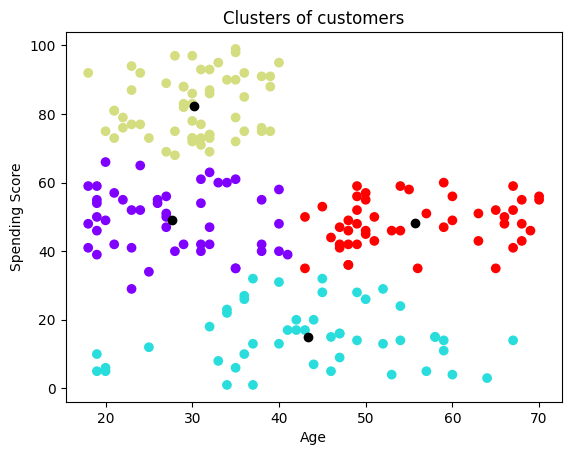

In [48]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### 7. Cluster based on annual income and spending

c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

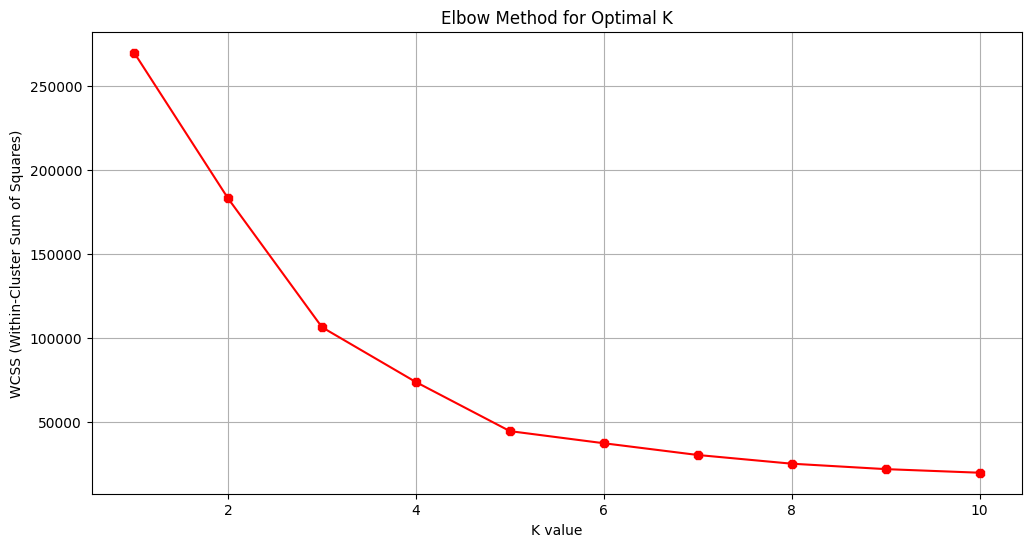

In [53]:
# Extracting features for clustering
Y1 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

# Importing KMeans from scikit-learn
from sklearn.cluster import KMeans

# Initializing an empty list to store the within-cluster sum of squares (WCSS) for different values of K
wcss = []

# Looping through different values of K (number of clusters)
for k in range(1, 11):
    # Creating a KMeans instance with k clusters and using 'k-means++' initialization
    kmeans = KMeans(n_clusters=k, init='k-means++')
    
    # Fitting the KMeans model to the data
    kmeans.fit(Y1)
    
    # Appending the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, color="red", marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [54]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(Y1)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


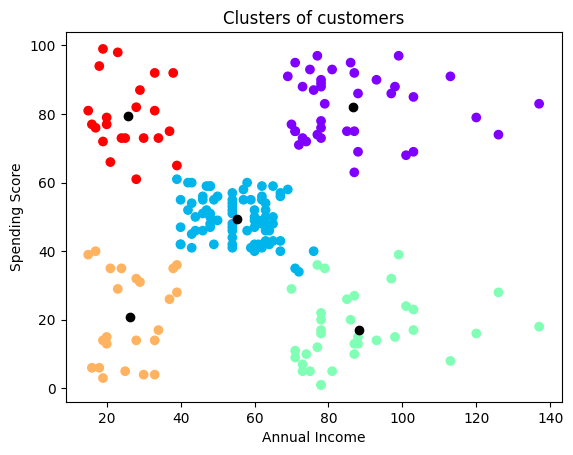

In [56]:
plt.scatter(Y1[:,0],Y1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### 8. ALL together - age, annual income and spending

c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

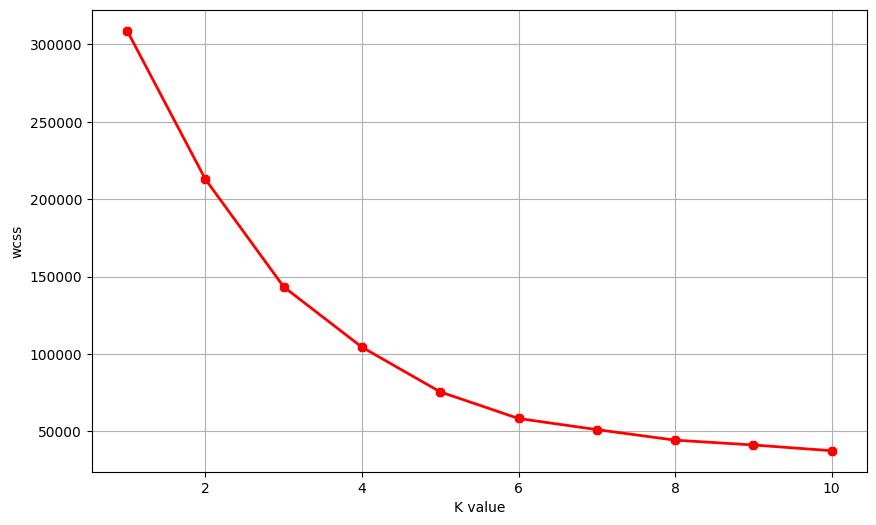

In [65]:
# Z=df.iloc[:,1:]
Z= df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)","Age"]].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K value")
plt.ylabel("wcss")
plt.show()

In [66]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(Z)
print(label)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 4 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


c:\Users\lyela\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348 45.2173913 ]
 [86.53846154 82.12820513 32.69230769]
 [28.04       77.         24.96      ]
 [87.43243243 18.18918919 40.32432432]
 [55.21052632 49.44736842 43.93421053]]


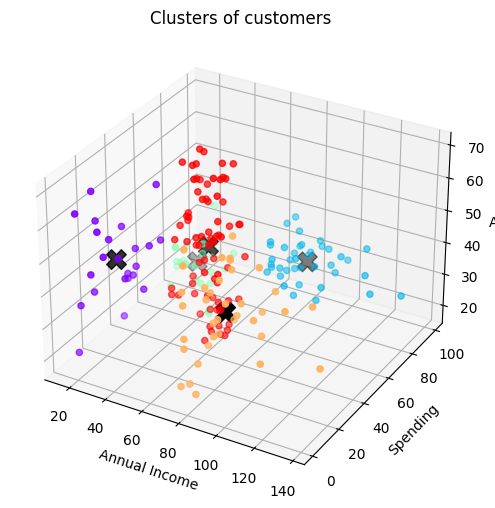

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for three columns
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black', marker='X', s=200)

ax.set_title('Clusters of customers')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending')
ax.set_zlabel('Age')

plt.show()

In [ ]:
plt.scatter(X[y_predicted == 0,0],X[y_predicted == 0,1],color='red')
plt.scatter(X[y_predicted == 1,0],X[y_predicted == 1,1],color='blue')
plt.scatter(X[y_predicted == 2,0],X[y_predicted == 2,1],color='grey')
plt.scatter(X[y_predicted == 3,0],X[y_predicted == 3,1],color='black')
plt.scatter(X[y_predicted == 4,0],X[y_predicted == 4,1],color='orange')
plt.title('Customers clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()